In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
#NVDA stock prices between Jan 21 to Dec 23
df_stocks_historical = pd.read_csv('/Users/shreyas/Downloads/NVDA_2021_2023.csv')
print(df_stocks_historical.shape)
df_stocks_historical.head()

(745, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-14,135.750000,135.997498,131.804993,132.002502,131.699493,28312000
1,2021-01-15,132.279999,133.252502,128.485001,128.595001,128.299789,27778000
2,2021-01-19,130.162506,130.940002,128.440002,130.252502,129.953506,22618800
3,2021-01-20,131.117493,134.304993,130.567505,133.657501,133.350693,25857200
4,2021-01-21,134.184998,139.992493,132.529999,138.675003,138.356659,33778000


In [4]:
#NVDA stock prices 2024
df_stocks_2024 = pd.read_csv('/Users/shreyas/Downloads/NVDA_2024.csv')
print(df_stocks_2024.shape)
df_stocks_2024.head()

(71, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,492.440002,492.950012,475.950012,481.679993,481.657410,41125400
1,2024-01-03,474.850006,481.839996,473.200012,475.690002,475.667694,32089600
2,2024-01-04,477.670013,485.000000,475.079987,479.980011,479.957489,30653500
3,2024-01-05,484.619995,495.470001,483.059998,490.970001,490.946960,41456800
4,2024-01-08,495.119995,522.750000,494.790009,522.530029,522.505493,64251000


In [5]:
df_stocks_historical = df_stocks_historical[["Date","Close"]] 
df_stocks_historical = df_stocks_historical.rename(columns = {"Close":"y", "Date":"ds"})
df_stocks_historical.head(5)

,ds,y
0,2021-01-14,132.002502
1,2021-01-15,128.595001
2,2021-01-19,130.252502
3,2021-01-20,133.657501
4,2021-01-21,138.675003


In [6]:
df_stocks_2024 = df_stocks_2024[["Date","Close"]] 
df_stocks_2024 = df_stocks_2024.rename(columns = {"Close":"y", "Date":"ds"})
df_stocks_2024.head(5)

,ds,y
0,2024-01-02,481.679993
1,2024-01-03,475.690002
2,2024-01-04,479.980011
3,2024-01-05,490.970001
4,2024-01-08,522.530029


In [7]:
m = NeuralProphet(
     batch_size=32,
     epochs=500,
     learning_rate=0.1,
)
metrics = m.fit(df_stocks_historical)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.242% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Training: 0it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.366% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.366% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 24it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


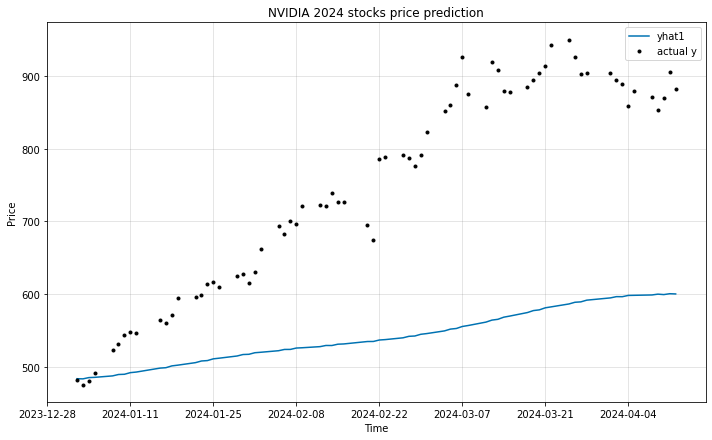

In [8]:
m.set_plotting_backend("matplotlib")
prediction = m.predict(df_stocks_2024)
forecast = m.plot(prediction)
plt.title('NVIDIA 2024 stocks price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
rmse = np.sqrt(mean_squared_error(prediction["y"].values, prediction["yhat1"]))
rmse

232.15188305376824

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


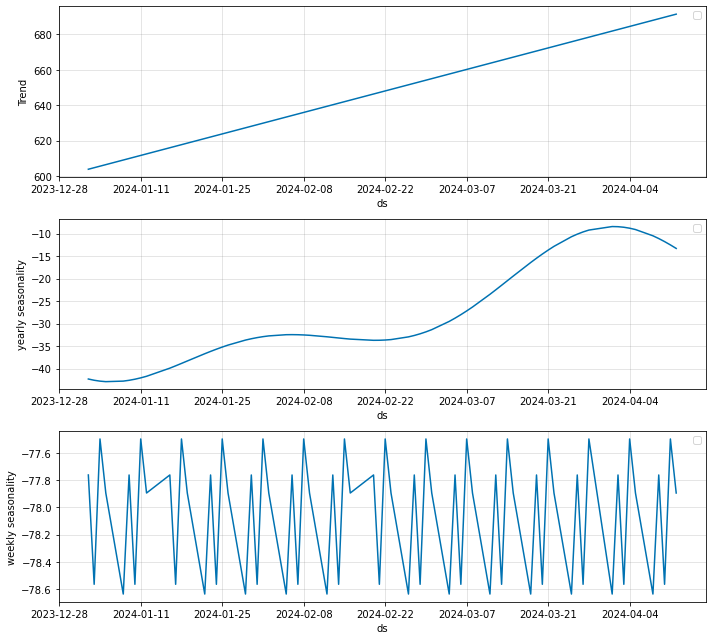

In [10]:
m.plot_components(prediction)
plt.show()